# Graphs

## Theory

A **graph** $G$ of order $o$ will be fully described by a square **adjacency matrix** $\mathcal{A}\in\mathbb{M}_{o\times o}(\mathbb{R})$ and a **state vector** $\mathcal{S}\in\mathbb{R}^{o}$.

$$G = \{\mathcal{A}, \mathcal{S}\}$$

The **adjacency matrix** contains the weights $w(e_{i,j})$ of the edges (from the vertex $v_i$ to $v_j$ in this case). The particular case of $w(e_{i,j})=0$ indicates that their is no edge going from $v_i$ to $v_j$.

$$\mathcal{A}_{i,j}=w(e_{i,j})$$

The **state vector** contains the states $s(v_i)$ of the vertices $v_i$.

$$\mathcal{S}_i=s(v_i)$$

The **neighborhood** $N(v)$ of a **vertex** $v$ is the set of vertices which are adjacent to it. Thanks to the linear algebra description of graphs, there is a simple way to obtain a vector containing the weighted sum of the states present in the neighborhood of every vertex of a graph.

$$\begin{pmatrix} \sum \limits _{v_i\in N(v_1)} w(e_{1,i})\times s(v_i) \\ \vdots \\ \sum \limits _{v_i\in N(v_o)} w(e_{o,i})\times s(v_i) \end{pmatrix}=\begin{pmatrix} \sum \limits _{i=1}^o w(e_{1,i})\times s(v_i) \\ \vdots \\ \sum \limits _{i=1}^o w(e_{o,i})\times s(v_i) \end{pmatrix}=\mathcal{A}\cdot\mathcal{S}$$

We can also define the **n-th neighborhood** $N_n(v)$ of a vertex as the set of vertices which are at a distance $n$ of $v$.

## Examples
The `Graph` class can be instantiated with two inputs: an **adjacency matrix** and a **state vector** both in the form of nested arrays.

In [1]:
import gra

graph = gra.Graph([ # adjacency matrix
        [0, 1, 1, 1],
        [1, 0, 1, 1],
        [1, 1, 0, 1],
        [1, 1, 1, 0] 
    ],[ # state vector
        [1],
        [0],
        [0],
        [0] 
    ])

**Graph** objects have three atributes:
* `adjacency_matrix` ( an instance of the SparseTensor class of TensorFlow )
* `state_vector` ( an instance of the Tensor class of TensorFlow )
* `dtype` ( a numpy data type object: np.int32 or np.float32 )

and eight methods:
* `.plot()`: plots the graph
* `.evolve(rule)`: evolves the graph according the `rule`
* `.order()`: returns the order of the graph
* `.diameter()`: returns the diameter of the graph
* `.clone()`: returns a copy of the graph, this allows to use rules without modifying the original graph
* `.to_igraph()`: returns an igraph object 
* `.to_networkx()`: returns a networkx object 
* `.to_mathematica()`: returns a string corresponding to a Mathematica compatible version of the graph

In the case of binary graphs $[s(v)\in \{0,1\}\;\forall v]$, plots are such that:
* "alive" vertices $[s(v)=1]$ are colored <span style="color:purple">*purple*</span>,
* "dead" vertices $[s(v)=0]$ are colored <span style="color:orange">*orange*</span>.

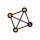

In [2]:
graph.plot()

Graphs with a different ordering of vertices are equivalent. This equivalence can be checked with `==`.

In [3]:
graph == gra.Graph([ # adjacency matrix
        [0, 1, 1, 1],
        [1, 0, 1, 1],
        [1, 1, 0, 1],
        [1, 1, 1, 0] 
    ],[ # state vector
        [0],
        [0],
        [1],
        [0] 
    ])

True